In [472]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [473]:
dataset=pd.read_csv(r'D:\data science projecta\Churn_Modelling.csv')

In [474]:
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [475]:
dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], inplace=True)

In [476]:
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [477]:
dataset.isnull().sum()


CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [478]:
input_data=dataset.iloc[:,:-1]
output_data=dataset.iloc[:,-1]

In [479]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [480]:
input_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [481]:
x_train , x_test ,y_train, y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=10)

In [482]:
import tensorflow as tf

In [483]:
from keras.layers import Dense,BatchNormalization,Dropout
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [484]:
ann=Sequential()

In [561]:
ann.add(Dense(32,input_dim=8,activation="relu",kernel_regularizer=L2(l2=0.001)))
ann.add(BatchNormalization())
ann.add(Dense(16,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(8,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dropout(0.3))
ann.add(Dense(1,activation="sigmoid"))

C:\Users\nk\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [562]:
ann.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [585]:
ann.fit(x_train,y_train,batch_size=130,epochs=60,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8602 - loss: 0.3900 - val_accuracy: 0.8425 - val_loss: 0.4213
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8602 - loss: 0.3784 - val_accuracy: 0.8375 - val_loss: 0.4714


In [586]:
train_accuracy=ann.history.history["accuracy"]
test_accuracy=ann.history.history["val_accuracy"]

In [587]:
len(test_accuracy)

2

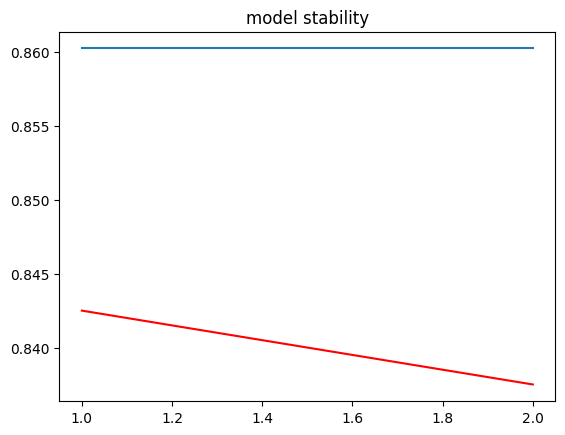

In [588]:
plt.plot([i for i in range(1,3)],train_accuracy)
plt.plot([i for i in range(1,3)],test_accuracy,c='red')
plt.title('model stability')
plt.show()

In [589]:
prd1 =ann.predict(x_train)
prd_data1=[]
for i in prd1:
    if i[0]>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 


In [590]:
prd =ann.predict(x_test)
prd_data=[]
for i in prd:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)
    

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [591]:
from sklearn.metrics import accuracy_score

In [592]:
accuracy_score(y_test,prd_data)*100

83.75

In [593]:
accuracy_score(y_train,prd_data1)*100

85.65

In [594]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
937,2.063884,0.484225,-0.004426,0.835324,-0.911583,-1.547768,0.970243,1.234723
9355,0.915392,0.102810,1.032908,-1.225848,-0.911583,0.646092,-1.030670,1.164024
2293,0.398053,0.579578,-1.733315,-0.299734,-0.911583,0.646092,-1.030670,1.699145
192,-1.774770,0.102810,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,0.259204
8675,0.656722,1.437761,0.687130,0.795384,-0.911583,0.646092,-1.030670,0.220617
...,...,...,...,...,...,...,...,...
5624,-0.346915,0.579578,-1.387538,-1.225848,-0.911583,0.646092,-1.030670,0.751341
6005,-0.150326,-1.422847,1.378686,-1.225848,0.807737,-1.547768,0.970243,-1.065242
987,-0.843560,-0.469311,-1.733315,1.207697,-0.911583,0.646092,-1.030670,0.038422
6152,-1.474714,2.391296,-1.041760,-1.225848,-0.911583,0.646092,0.970243,-1.634803


In [595]:
prd =ann.predict(x_test.iloc[[1]])
prd_data=[]
for i in prd:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)
prd_data   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


[0]

In [466]:
y_test

937     0
9355    0
2293    1
192     0
8675    0
       ..
5624    0
6005    0
987     1
6152    0
2092    1
Name: Exited, Length: 2000, dtype: int64